<a href="https://colab.research.google.com/github/sajal329/Statistics-and-Trends-assignment/blob/main/Data_clustering_and_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

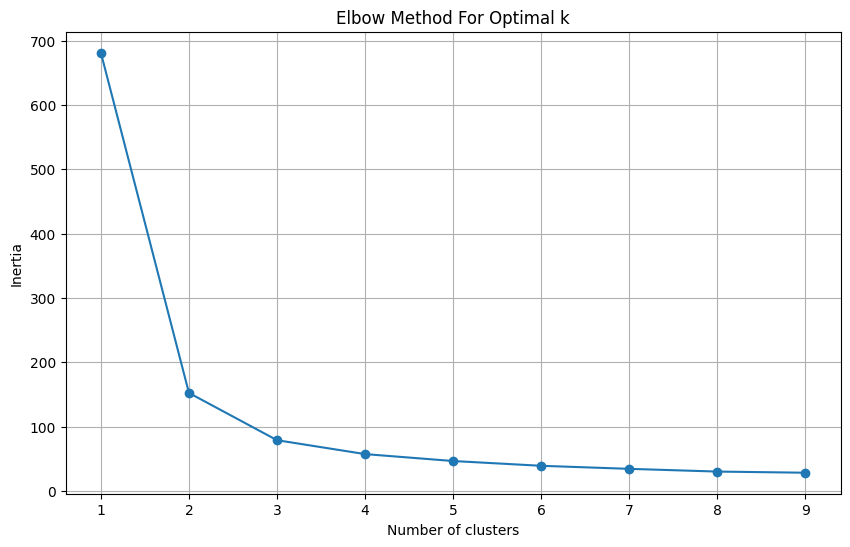

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


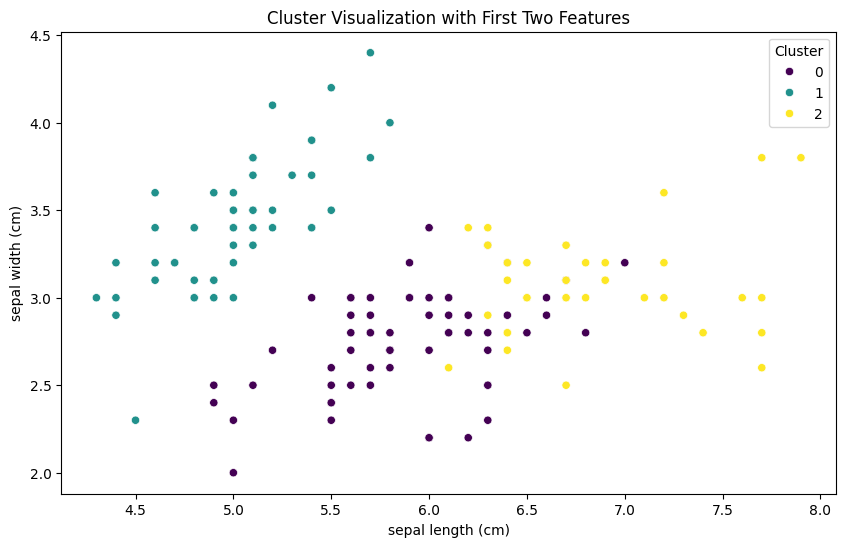

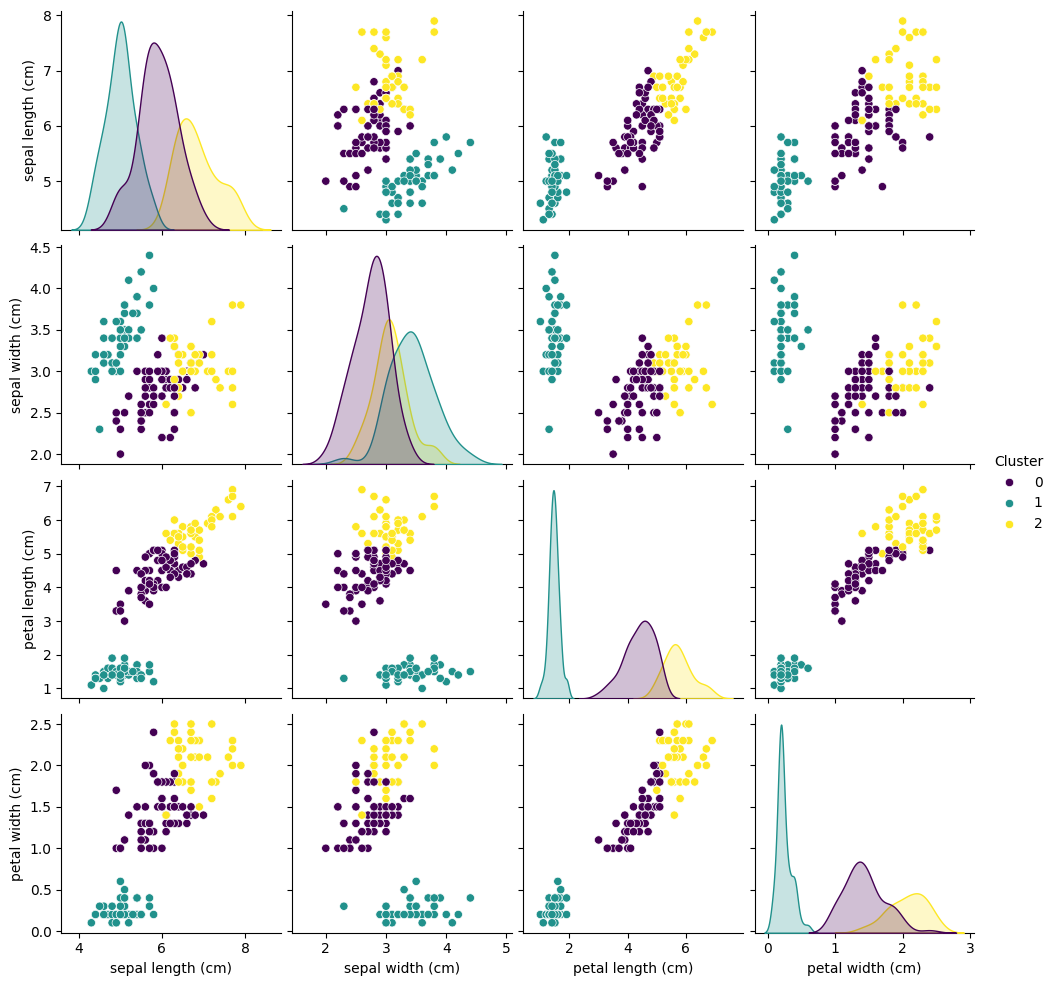

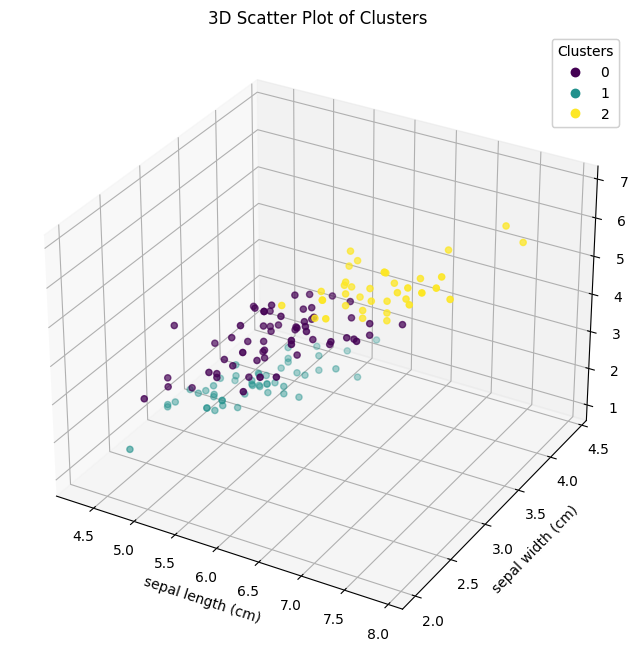

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Apply K-means clustering
k_values = range(1, 10)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Perform K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

# Scatter plot of the clusters based on two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette='viridis')
plt.title('Cluster Visualization with First Two Features')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(title='Cluster')
plt.show()

# Pairplot with the cluster assignments
df = pd.DataFrame(X, columns=feature_names)
df['Cluster'] = clusters
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

# 3D scatter plot of the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])
plt.title('3D Scatter Plot of Clusters')
plt.show()

Data Fitting

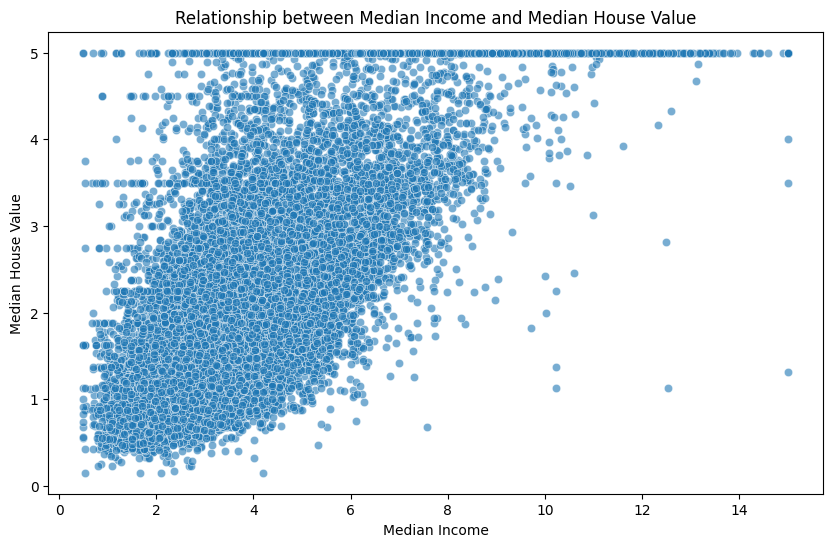

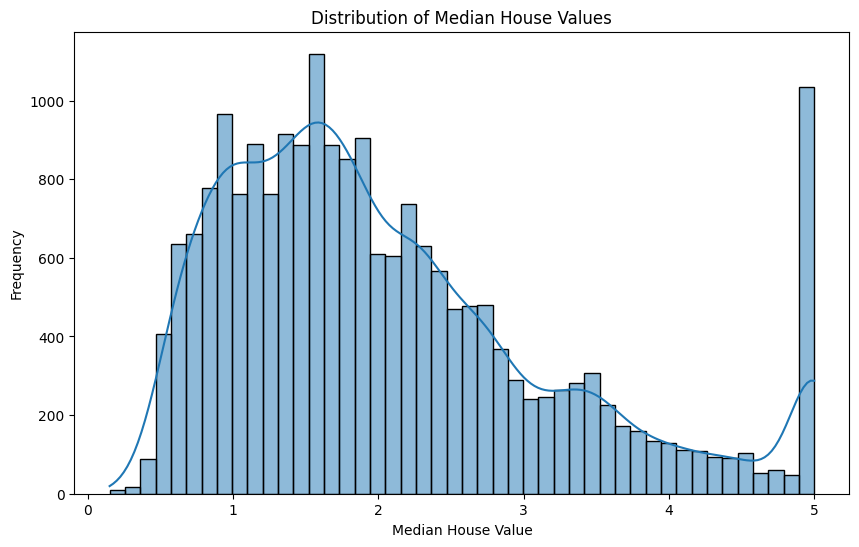

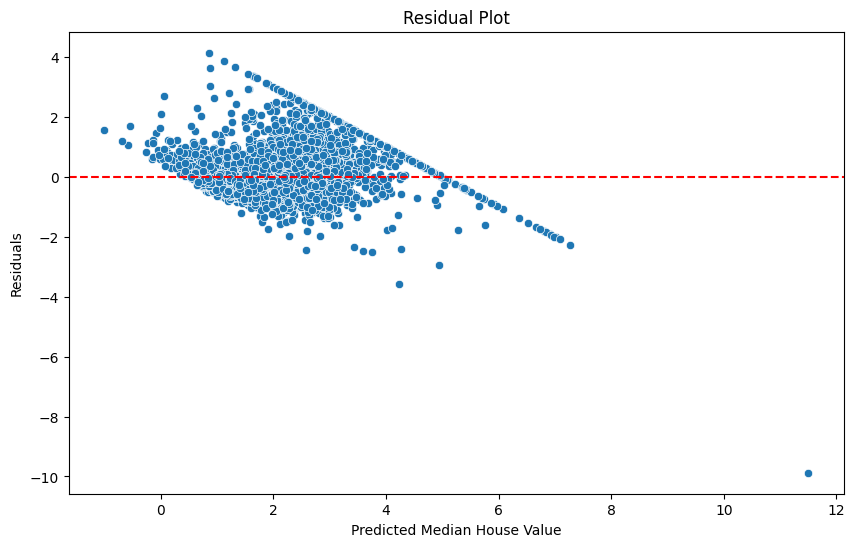

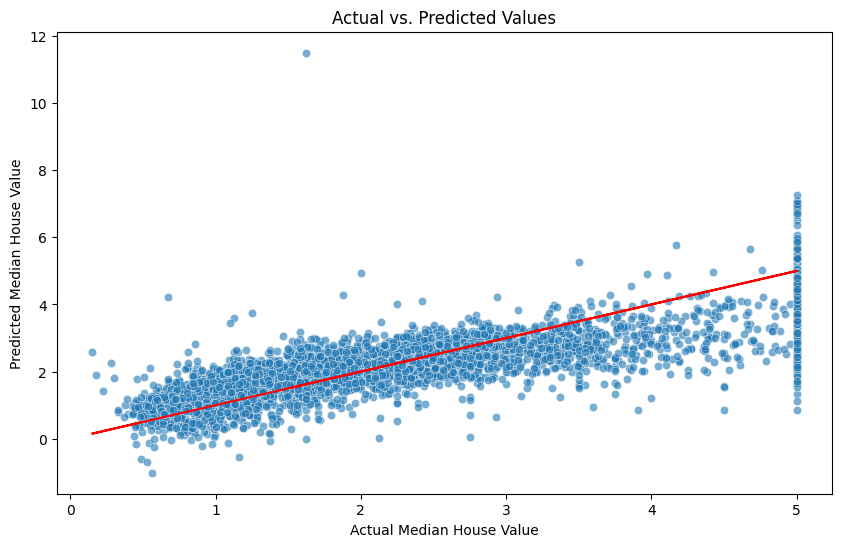

Mean Squared Error: 0.5558915986952444
R² Score: 0.5757877060324508


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
california_housing = fetch_california_housing(as_frame=True)
X = california_housing.data
y = california_housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Visualization 1: Scatter plot for feature 'Median Income' vs. 'Median House Value'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['MedInc'], y=y, alpha=0.6)
plt.title('Relationship between Median Income and Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Visualization 2: Histogram of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Visualization 3: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Median House Value')
plt.ylabel('Residuals')
plt.show()

# Visualization 4: Prediction Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot(y_test, y_test, color='red')  # Line for perfect predictions
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.show()

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
